# 1. Getting the Light Curve

This notebook retrieves the light curve of AT2017gfo, the ultraviolet, optical, and near-infrared counterpart of GW170817, from [Open Kilonova Catalog](https://kilonova.space).

## Imports

In [1]:
from astropy.table import Table
from astropy.time import Time
from astropy import units as u
from matplotlib import pyplot as plt
%matplotlib inline

## Merger time

LIGO/Virgo merger time in UTC from [GCN 21513](https://gcn.gsfc.nasa.gov/gcn3/21513.gcn3).

In [2]:
t0 = Time(1187008882.443, format='gps').utc
t0.iso

'2017-08-17 12:41:04.443'

## Download photometry

Retrieve the light curve from the [Open Kilonova Catalog](https://kilonova.space).

In [3]:
url = 'https://api.kilonova.space/GW170817/photometry/system+upperlimit+time+band+magnitude+e_magnitude?format=csv'
photometry = Table.read(url, format='ascii')

# Keep only data points that are in the AB magnitude system.
photometry = photometry[photometry.columns.pop('system') == 'AB']

# Keep only detections (no upper limits).
photometry = photometry[photometry.columns.pop('upperlimit') == 'F']

# Get rid of unfiltered observations (mostly MASTER).
photometry = photometry[photometry['band'] != 'C']
photometry = photometry[photometry['band'] != 'W']

# Convert to time since merger.
photometry['time'] = (np.asarray(photometry.columns.pop('time')).astype(float) - t0.mjd)

# Add unit metadata to table.
photometry['magnitude'].unit = photometry['e_magnitude'].unit = u.ABmag
photometry['time'].unit = u.day

# Show table.
photometry

band,magnitude,e_magnitude,time
,mag(AB),mag(AB),d
str5,float64,float64,float64
i,17.48,0.02,0.45287635416
H,18.26,0.15,0.461676354164
r,17.46,0.03,0.464476354166
Ks,18.62,0.05,0.470476354167
J,17.83,0.15,0.471476354163
V,17.35,0.02,0.471476354163
r,17.33,0.02,0.471476354163
z,17.67,0.03,0.471476354163


## Plot the light curve in a few selected bands

Text(0,0.5,'apparent magnitude (AB)')

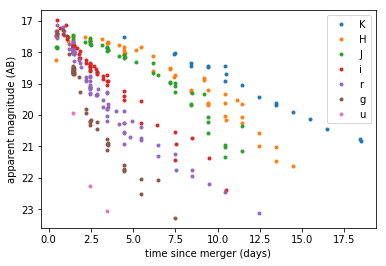

In [4]:
ax = plt.axes()
ax.invert_yaxis()
for band in ['K', 'H', 'J', 'i', 'r', 'g', 'u']:
    _ = photometry[photometry['band'] == band]
    ax.plot(_['time'], _['magnitude'], '.', label=band)
ax.legend()
ax.set_xlabel('time since merger (days)')
ax.set_ylabel('apparent magnitude (AB)')

## Save as an ASCII file

In [5]:
photometry.write('data/photometry.txt', format='ascii.ecsv', overwrite=True)